In [ ]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("Uploaded:", file_name)

Saving download (1).jpg to download (1).jpg
Uploaded: download (1).jpg


In [ ]:
model=YOLO('yolov8n.pt')

In [ ]:
results = model(file_name)
annotated = results[0].plot()


image 1/1 /content/download (1).jpg: 640x640 1 apple, 497.5ms
Speed: 24.7ms preprocess, 497.5ms inference, 45.1ms postprocess per image at shape (1, 3, 640, 640)


(np.float64(-0.5), np.float64(223.5), np.float64(224.5), np.float64(-0.5))

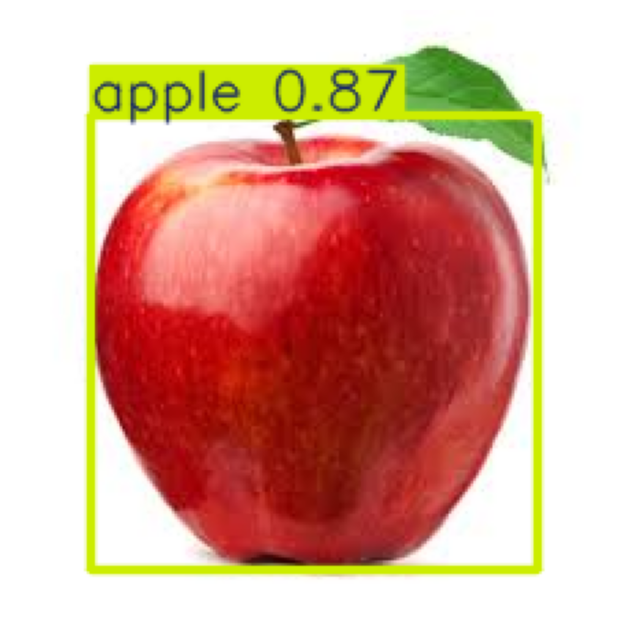

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
plt.axis('off')

In [ ]:
uploaded=files.upload()
video_path=list(uploaded.keys())[0]
print("Uploaded:",video_path)

Saving model.mp4 to model.mp4
Uploaded: model.mp4


In [ ]:
output_path="output_detected.mp4"
cap=cv2.VideoCapture(video_path)
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=cap.get(cv2.CAP_PROP_FPS)or 25.0
fourcc=cv2.VideoWriter_fourcc(*'mp4v')
out=cv2.VideoWriter(output_path,fourcc,fps,(width,height))

frame_count=0
while True:
  ret, frame= cap.read()
  if not ret:
    break
  results=model(frame)
  annotated=results[0].plot()
  out.write(annotated)
  frame_count+=1
  if frame_count%50==0:
    print(f"Processed {frame_count} frames")
cap.release()
out.release()

print("Video Saved:",output_path)
files.download(output_path)


0: 640x448 3 persons, 1 chair, 188.9ms
Speed: 4.2ms preprocess, 188.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 2 persons, 1 chair, 176.5ms
Speed: 3.7ms preprocess, 176.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 3 persons, 1 chair, 195.9ms
Speed: 5.4ms preprocess, 195.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 3 persons, 1 chair, 169.8ms
Speed: 3.9ms preprocess, 169.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 3 persons, 1 chair, 174.0ms
Speed: 3.4ms preprocess, 174.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 3 persons, 1 chair, 166.4ms
Speed: 4.6ms preprocess, 166.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 2 persons, 1 chair, 171.5ms
Speed: 3.7ms preprocess, 171.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 2 persons, 1 chair, 18

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Captured: snapshot.jpg

image 1/1 /content/snapshot.jpg: 480x640 4 persons, 443.6ms
Speed: 12.0ms preprocess, 443.6ms inference, 40.1ms postprocess per image at shape (1, 3, 480, 640)


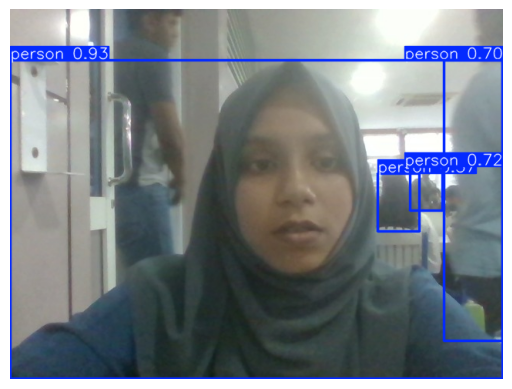

In [ ]:

!pip install -q ultralytics opencv-python-headless pillow
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from base64 import b64decode
from google.colab import output

model = YOLO('yolov8n.pt')


def take_photo(filename='snapshot.jpg'):
    js = """
    async function takePhoto() {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      document.body.appendChild(div);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize window
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture button
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
      div.remove();
      return imgData;
    }
    takePhoto();
    """
    data = output.eval_js(js)
    with open(filename, 'wb') as f:
        f.write(b64decode(data))
    return filename

filename = take_photo('snapshot.jpg')
print("Captured:", filename)


results = model(filename)
annotated = results[0].plot()
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Saving Screenshot (634).png to Screenshot (634).png
Processing Screenshot (634).png...

image 1/1 /content/Screenshot (634).png: 384x640 1 person, 1 tv, 1 laptop, 273.7ms
Speed: 12.2ms preprocess, 273.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


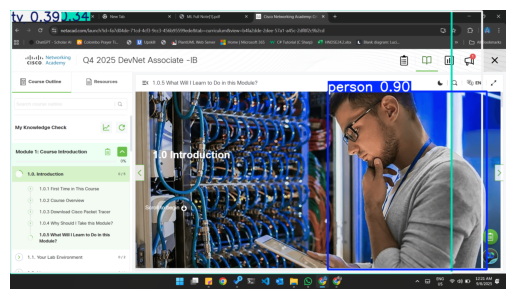

In [ ]:
from google.colab import files
import glob
import cv2
import matplotlib.pyplot as plt


uploaded = files.upload()


for img_name in uploaded.keys():
    print(f"Processing {img_name}...")
    results = model(img_name)
    annotated = results[0].plot()
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

In [ ]:
model=YOLO('yolov8n.pt')

In [ ]:
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip -d dataset
!ls dataset/coco128

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  8538k      0 --:--:-- --:--:-- --:--:-- 8538k
images	labels	LICENSE  README.txt


In [ ]:
%%writefile dataset/coco128.yaml
path: dataset/coco128
train: images/train2017
val: images/train2017

nc: 80
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush

Writing dataset/coco128.yaml



image 1/1 /content/dataset/coco128/images/train2017/000000000009.jpg: 480x640 4 bowls, 1 broccoli, 1 hot dog, 650.3ms
Speed: 16.0ms preprocess, 650.3ms inference, 10.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict


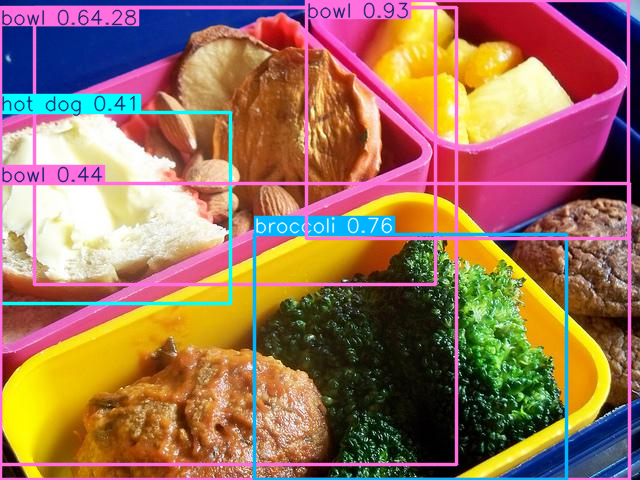

In [ ]:
results=model.predict("/content/dataset/coco128/images/train2017/000000000009.jpg",save=True)
results[0].show()

In [ ]:
!pip install streamlit==1.38.0 ultralytics==8.3.0 pyngrok==7.1.6 opencv-python-headless pillow pandas

In [16]:
%%writefile app_streamlit.py
import streamlit as st
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2, tempfile, os, glob
import pandas as pd
from pathlib import Path

# ==== PAGE CONFIG ====
st.set_page_config(page_title="YOLOv8 Object Detection", layout="wide")

# ==== CUSTOM CSS ====
st.markdown(
    f"""
    <style>
    /* ===== App Background Image ===== */
    .stApp {{
        background-image: url("https://i.ibb.co/C5SbJHq3/bg.jpg");
        background-size: cover;
        background-position: center;
        background-attachment: fixed;
        font-family: 'Poppins', sans-serif;
    }}

    /* ===== Sidebar ===== */
    section[data-testid="stSidebar"] {{
        background: rgba(30, 30, 30, 0.85);
        backdrop-filter: blur(8px);
        border-radius: 12px;
        padding: 18px;
    }}
    section[data-testid="stSidebar"] * {{
        color: #f1f1f1 !important;
        font-weight: 500;
    }}

    /* ===== Radio Buttons ===== */
    div[role="radiogroup"] label {{
        color: black !important;
        font-weight: 600;
        font-size: 16px;
    }}

    /* ===== File uploader ===== */
    div[data-testid="stFileUploader"] {{
        background: rgba(255, 255, 255, 0.85);
        border-radius: 12px;
        padding: 15px;
        border: 2px dashed #0288d1;
    }}
    div[data-testid="stFileUploader"] * {{
        color: #0d1b2a !important;
    }}

    /* ===== Buttons ===== */
    div.stButton > button {{
        background: linear-gradient(90deg, #0288d1, #26c6da);
        color: white;
        border-radius: 10px;
        padding: 0.6em 1.2em;
        font-size: 16px;
        font-weight: 600;
        transition: 0.3s;
    }}
    div.stButton > button:hover {{
        background: linear-gradient(90deg, #026aa7, #0097a7);
        transform: scale(1.05);
    }}

    /* ===== DataFrame styling ===== */
    .stDataFrame {{
        background: rgba(255, 255, 255, 0.95);
        border-radius: 15px;
        padding: 12px;
        box-shadow: 0 6px 12px rgba(0,0,0,0.25);
    }}
    </style>
    """,
    unsafe_allow_html=True
)


# ==== TITLE ====
st.title("⚡ YOLOv8 Object Detection Dashboard")

# ==== Sidebar Config ====
uploaded_weights = st.sidebar.file_uploader("Upload custom .pt weights (optional)", type=["pt"])
conf = st.sidebar.slider("Confidence threshold", 0.0, 1.0, 0.25, 0.01)
img_size = st.sidebar.selectbox("Inference image size (px)", [320, 416, 640, 1280], index=2)

@st.cache_resource
def load_model(weights_path="yolov8n.pt"):
    return YOLO(weights_path)

def save_uploaded_file(uploaded_file, suffix=""):
    suffix = suffix if suffix else Path(uploaded_file.name).suffix
    tf = tempfile.NamedTemporaryFile(delete=False, suffix=suffix)
    tf.write(uploaded_file.getbuffer())
    tf.flush()
    return tf.name

def annotate_and_table(results, model):
    res = results[0]
    try:
        plotted = res.plot()
        annotated = cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB)
    except Exception:
        annotated = res.orig_img if hasattr(res, "orig_img") else None

    detections = []
    try:
        boxes = res.boxes
        if boxes is not None and len(boxes) > 0:
            for c, cf, box in zip(boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy(), boxes.xyxy.cpu().numpy()):
                name = model.names[int(c)]
                detections.append({"class": name, "conf": float(cf), "bbox": [float(x) for x in box]})
    except:
        detections = []

    return annotated, pd.DataFrame(detections)

# ==== Load Model ====
weights_to_load = "yolov8n.pt"
if uploaded_weights:
    weights_to_load = save_uploaded_file(uploaded_weights, suffix=".pt")
    st.sidebar.success("Using uploaded weights")

model = load_model(weights_to_load)

# ==== Mode Selection ====
mode = st.radio("Select input", ["Image upload", "Video upload"])

# ==== IMAGE MODE ====
if mode == "Image upload":
    uploaded = st.file_uploader("Upload image", type=["jpg","jpeg","png"])
    if uploaded:
        img = Image.open(uploaded).convert("RGB")
        st.image(img, caption="Input image")
        results = model.predict(np.array(img), conf=conf, imgsz=img_size)
        annotated, df = annotate_and_table(results, model)
        if annotated is not None:
            st.image(annotated, caption="Annotated")
        if not df.empty:
            st.dataframe(df)

# ==== VIDEO MODE ====
elif mode == "Video upload":
    uploaded_vid = st.file_uploader("Upload video", type=["mp4","mov","avi","mkv"])
    if uploaded_vid:
        tmp = save_uploaded_file(uploaded_vid)
        st.video(tmp)
        project_dir = tempfile.mkdtemp()
        results = model.predict(source=tmp, conf=conf, imgsz=img_size, project=project_dir, name="run", save=True)
        try:
            out_dir = str(results[0].save_dir)
            vids = glob.glob(os.path.join(out_dir, "*"))
            vids = [v for v in vids if Path(v).suffix.lower() in [".mp4",".avi",".mov",".mkv"]]
            if vids:
                st.success("Annotated video")
                st.video(vids[0])
        except:
            st.warning("Could not display annotated video")


Overwriting app_streamlit.py


In [9]:
!pip install pyngrok


In [12]:
!pip install streamlit


In [6]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.1 MB/s eta 0:00:00


In [17]:
from pyngrok import ngrok


NGROK_AUTH_TOKEN = "32myLjos3HsYLw0mIQBdrZUzHks_5qdg9DYUbKZ8kwhUDve1i"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)


public_url = ngrok.connect(8501)
print("Public URL:", public_url)


!streamlit run app_streamlit.py --server.port 8501 &

import time
while True:
    time.sleep(60)

Public URL: NgrokTunnel: "https://602b263c0b62.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.146.54:8501


0: 288x640 6 persons, 338.6ms
Speed: 26.9ms preprocess, 338.6ms inference, 35.3ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 2 persons, 1 traffic light, 105.9ms
Speed: 2.7ms preprocess, 105.9ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 640)

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment ma

KeyboardInterrupt: 